In [9]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl

# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [52]:
# Clean data adjust EIN column and set as index
charity_df = pd.read_csv("charity_data.csv", index_col=0)
charity_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,,
10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [53]:
# Save NAME column as a separate dataframe, use EIN same index drop it 
# from charity dataframe since NAME is not needed as a target
name_df = charity_df[["NAME"]]
charity_df = charity_df.drop(columns=["NAME"], axis = 1)

In [54]:
# QC new dataframe
name_df.head(5)

,NAME
EIN,
10520599,BLUE KNIGHTS MOTORCYCLE CLUB
10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR
10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS
10553066,SOUTHSIDE ATHLETIC ASSOCIATION
10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT


In [55]:
# QC new dataframe
charity_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,
10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [56]:
# Define target as "IS_SUCCESSFUL" column
y = charity_df["IS_SUCCESSFUL"].values

# Drop "IS_SUCCESSFUL" from dataframe so only features that are needed are in  it
charity_df = charity_df.drop(columns=["IS_SUCCESSFUL"], axis = 1)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
EIN,,,,,,,,,
10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000
10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590
10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000
10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692
10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590


In [57]:
# Create categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [58]:
charity_df.dtypes
# Status and ASK_AMT is numerical

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
dtype: object

In [59]:
# Find out the APPLICATION_TYPE value counts
application_type_counts = charity_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [60]:
charity_df[charity_cat].nunique()
# Double checkign unique values since app_type and classification
# need bucketing

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

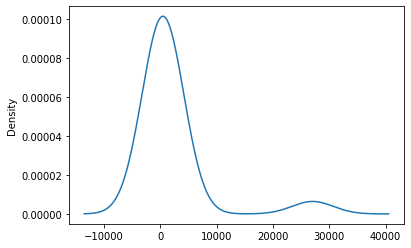

In [61]:
# Visualize application type counts
application_type_counts.plot.density()

In [62]:
# Application has too many bins need to scale down since majority are in T3, group
# everyone less than 500 to decrease bins
replace_app_types = list(application_type_counts[application_type_counts < 500].index)

for app_type in decrease_app_types:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app_type,"Other")

In [63]:
# QC decreased bins scaled down
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [73]:
# Find out the CLASSIFICATION value counts
classification_counts = charity_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4200        1
C2570        1
C1732        1
C2600        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [68]:
classification_counts = charity_df.APPLICATION_TYPE.value_counts()

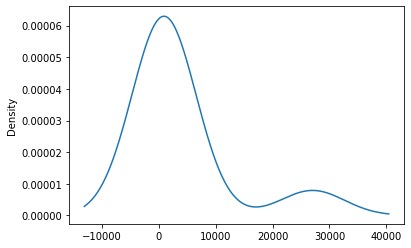

In [71]:
# Visualize the value counts - density plot
classification_counts.plot.density()

In [74]:
# Determine which values to replace
replace_class = list(classification_counts[classification_counts < 500].index)

# Replace in DataFrame
for classa in replace_class:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classa,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [79]:
# Create the OneHotEncoder instance

enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]), index = charity_df.index)

# Rename encoded columns
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10531628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10547893,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10553066,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10556103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
# Merge the two DataFrames together and drop the Country column
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,1,5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10531628,1,108590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10547893,1,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10553066,1,6692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10556103,1,142590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
X = charity_df.values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [94]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 360       
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 6         
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [96]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
25724/25724 [==============================] - 2s 67us/sample - loss: 21215.7947 - acc: 0.4843
Epoch 2/100
25724/25724 [==============================] - 1s 50us/sample - loss: 17353.2714 - acc: 0.5105
Epoch 3/100
25724/25724 [==============================] - 1s 51us/sample - loss: 10544.4949 - acc: 0.5094
Epoch 4/100
25724/25724 [==============================] - 1s 49us/sample - loss: 20755.6883 - acc: 0.4965
Epoch 5/100
25724/25724 [==============================] - 1s 50us/sample - loss: 15223.7226 - acc: 0.4964
Epoch 6/100
25724/25724 [==============================] - 1s 50us/sample - loss: 6297.1132 - acc: 0.5297
Epoch 7/100
25724/25724 [==============================] - 1s 52us/sample - loss: 7886.3933 - acc: 0.5166
Epoch 8/100
25724/25724 [==============================] - 2s 60us/sample - loss: 13238.3936 - acc: 0.53340s - loss: 21295.962
Epoch 9/100
25724/25724 [==============================] - 2s 61us/sample - loss: 10485.7829 - acc: 0.5343
Epoch 10/100
25724/

25724/25724 [==============================] - 1s 54us/sample - loss: 0.6912 - acc: 0.5318
Epoch 79/100
25724/25724 [==============================] - 2s 58us/sample - loss: 0.6912 - acc: 0.5318
Epoch 80/100
25724/25724 [==============================] - 1s 54us/sample - loss: 0.6912 - acc: 0.5318
Epoch 81/100
25724/25724 [==============================] - 2s 97us/sample - loss: 0.6912 - acc: 0.5318
Epoch 82/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.6912 - acc: 0.5318
Epoch 83/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.6912 - acc: 0.5318
Epoch 84/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.6912 - acc: 0.5318
Epoch 85/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.6912 - acc: 0.5318
Epoch 86/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6912 - acc: 0.5318
Epoch 87/100
25724/25724 [==============================] - 2s 61us/sample - 

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6908 - acc: 0.5343
Loss: 0.6907867909937488, Accuracy: 0.5343440175056458


# Accuracy at 53% for model1

In [100]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 80)                3600      
_________________________________________________________________
dense_23 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [102]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=80)

Epoch 1/80
25724/25724 [==============================] - 2s 59us/sample - loss: 26293.7306 - acc: 0.5015
Epoch 2/80
25724/25724 [==============================] - 1s 58us/sample - loss: 25372.7363 - acc: 0.4979
Epoch 3/80
25724/25724 [==============================] - 1s 55us/sample - loss: 12368.6224 - acc: 0.5018
Epoch 4/80
25724/25724 [==============================] - 1s 54us/sample - loss: 72299.6526 - acc: 0.4905
Epoch 5/80
25724/25724 [==============================] - 1s 55us/sample - loss: 25225.1113 - acc: 0.4930
Epoch 6/80
25724/25724 [==============================] - 1s 55us/sample - loss: 6145.9031 - acc: 0.5003
Epoch 7/80
25724/25724 [==============================] - 1s 58us/sample - loss: 22177.6890 - acc: 0.5245
Epoch 8/80
25724/25724 [==============================] - 2s 69us/sample - loss: 2792.4053 - acc: 0.5182
Epoch 9/80
25724/25724 [==============================] - 2s 78us/sample - loss: 4343.3792 - acc: 0.5074
Epoch 10/80
25724/25724 [========================

25724/25724 [==============================] - 1s 53us/sample - loss: 0.6914 - acc: 0.5318


In [103]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6909 - acc: 0.5343
Loss: 0.6909056588929179, Accuracy: 0.5343440175056458


# Same acc rate as model1

In [104]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                2250      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 4,851
Trainable params: 4,851
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)

Epoch 1/50
25724/25724 [==============================] - 2s 65us/sample - loss: 53997.2237 - acc: 0.4869
Epoch 2/50
25724/25724 [==============================] - 1s 56us/sample - loss: 74124.0075 - acc: 0.4909
Epoch 3/50
25724/25724 [==============================] - 1s 58us/sample - loss: 29872.8752 - acc: 0.5094
Epoch 4/50
25724/25724 [==============================] - 1s 55us/sample - loss: 69412.5246 - acc: 0.4945
Epoch 5/50
25724/25724 [==============================] - 1s 58us/sample - loss: 46104.2130 - acc: 0.5090
Epoch 6/50
25724/25724 [==============================] - 1s 57us/sample - loss: 37641.5740 - acc: 0.5105
Epoch 7/50
25724/25724 [==============================] - 1s 58us/sample - loss: 9531.1824 - acc: 0.5033
Epoch 8/50
25724/25724 [==============================] - 2s 64us/sample - loss: 41429.6462 - acc: 0.5145
Epoch 9/50
25724/25724 [==============================] - 2s 74us/sample - loss: 24108.7194 - acc: 0.5162
Epoch 10/50
25724/25724 [======================

In [106]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6914 - acc: 0.5343
Loss: 0.6913554286748258, Accuracy: 0.5343440175056458
